# Ridge and Lasso Regression

In Regression our goal is to minimizing cost function.
For Linear Regression cost function: $$J=\sum_{i=1}^n (Ytrue-Ypred)^2$$
For Ridge Regression cost function: $$J=\sum_{i=1}^n (Ytrue-Ypred)^2 + \lambda (slope)^2$$
Penalizing higher Slopes.$$  $$
For Lasso Regression cost function: $$J=\sum_{i=1}^n (Ytrue-Ypred)^2 + \lambda |slope|$$
So Goal is to mimimize cost function

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
df=load_boston()
dataset=pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.target.shape

(506,)

In [5]:
dataset['Price']=df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# checking missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

We don't have any missing value

In [7]:
# dependent and independent feature extraction from dataset
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.shape,y.shape

((506, 13), (506,))

## Linear Regression


In [8]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg_MSE=cvs(lin_reg,X,y,scoring="neg_mean_squared_error",cv=5)
lin_reg_Mean_MSE=np.mean(lin_reg_MSE)
lin_reg_Mean_MSE

-37.13180746769923

Perfromance will be better If cross validation score is more towards 0

## Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={
    'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,30,35,40,45,50,55,100,150,200]
}
ridge_reg=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_reg.fit(X,y)

C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [10]:
ridge_reg.best_params_

{'alpha': 150}

In [11]:
ridge_reg.best_estimator_

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
ridge_reg.best_score_

-29.721053293873716

In [13]:
ridge_reg=Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

It is better than Linear 

# Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
lasso=Lasso()

params={
    'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,30,35,40,45,50,55,100,150,200]
}
lasso_reg=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_reg.fit(X,y)


C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [15]:
lasso_reg.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso_reg.best_params_

{'alpha': 0.1}

In [17]:
lasso_reg.best_score_

-34.783774590828195

In [18]:
lasso=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Fitting models and comparing

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

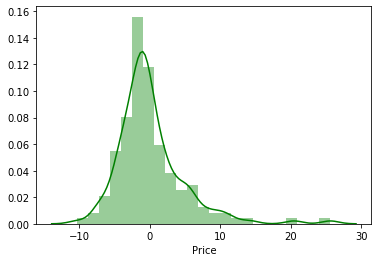

In [20]:
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
sns.distplot(y_test-lasso_pred,color="green")

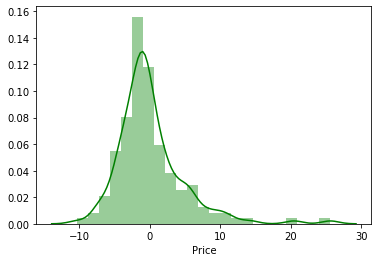

In [21]:
ridge_reg.fit(X_train,y_train)
ridge_pred=lasso.predict(X_test)
sns.distplot(y_test-ridge_pred,color="green")

# Ridge Regression has better pereformace than Lasso and Linear.